# Node를 통한 경로 확인  osmnx

In [ ]:
import networkx as nx
import osmnx as ox
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import folium
import geopandas as gpd

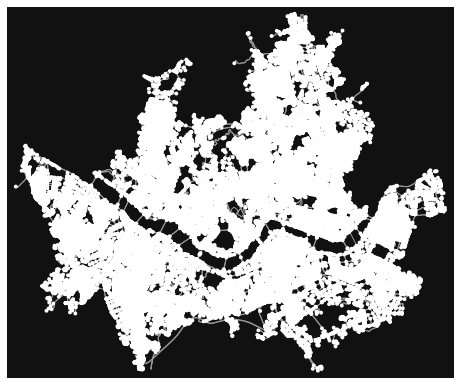

In [2]:
# www.openstreetmap.org 사이트 검색
#입력을 city-state-country 단위 순으로 해야함

G = ox.graph_from_place('서울, 대한민국', network_type='drive')
fig, ax = ox.plot_graph(G)


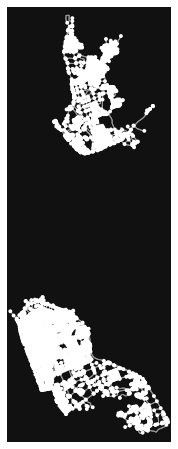

In [13]:
# 동작구와 노원구를 각각의 그래프로 생성
G_dongjak = ox.graph_from_place('노원구, 서울, 대한민국', network_type='drive')
G_nowon = ox.graph_from_place('강남구, 서울, 대한민국', network_type='drive')

# 두 그래프를 합치기
G_combined = nx.compose(G_dongjak, G_nowon)

# 그래프 시각화
fig, ax = ox.plot_graph(G_combined)

In [4]:
G_proj = ox.project_graph(G)

In [5]:
orig_node = ox.nearest_nodes(G, 37.6148083, 127.0658393)                  # 위/경도 입력 (시작점)
# dest_node = ox.nearest_nodes(G_proj, 37.573829, 126.973148) 
dest_node1 = ox.nearest_nodes(G_proj, 37.1991743092707, 127.114278180857) # 위/경도 입력 (도착점)

/Users/seoghyeonjin/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/seoghyeonjin/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/seoghyeonjin/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [7]:
# route = nx.shortest_path(G, orig_node, dest_node, weight='length')
route1 = nx.shortest_path(G, orig_node, dest_node1, weight='length')

In [9]:
# len = nx.shortest_path_length(G, orig_node, dest_node, weight='length') / 1000
len = nx.shortest_path_length(G, orig_node, dest_node1, weight='length') / 1000

print(round(len, 1), "킬로미터") # 거리 계산

36.0 킬로미터


In [12]:
# route1에 대한 경로도 추가
route_graph_map = ox.plot_route_folium(G, route1, popup_attribute='length').add_to(route_graph_map)
route_graph_map.save('route_MAP.html')

/var/folders/j5/k9v_p2y97k3299xzm4c48rg40000gn/T/ipykernel_5513/1136178549.py:5: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  route_graph_map = ox.plot_route_folium(G, route1, popup_attribute='length').add_to(route_graph_map)


In [ ]:
# Folium 맵 생성
route_graph_map = folium.Map(location=[37.5804100, 127.0462200], zoom_start=14, control_scale=True)

# 각 경로에 대한 Folium FeatureGroup 생성
fg_route = folium.FeatureGroup(name='청량리역에서 동대문역까지')
fg_route1 = folium.FeatureGroup(name='청량리역에서 추가 목적지 동대문역까지')

# 경로에 대한 좌표 가져오기
coords_route = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route]
coords_route1 = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route1]

# 각 FeatureGroup에 Polyline 추가
folium.PolyLine(coords_route, color="blue", weight=2.5, opacity=1).add_to(fg_route)
folium.PolyLine(coords_route1, color="red", weight=2.5, opacity=1).add_to(fg_route1)

# 각 FeatureGroup을 Folium 맵에 추가
fg_route.add_to(route_graph_map)
fg_route1.add_to(route_graph_map)

# Folium 맵 저장
route_graph_map.save('route_MAP2.html')

In [ ]:
# 시작 노드 및 목적지 노드들
orig_node = ox.nearest_nodes(G, 37.5804100, 127.0462200)  # 청량리역
# dest_node = ox.nearest_nodes(G_proj, 37.5718616, 127.0114887)  # 동대문역
dest_node1 = ox.nearest_nodes(G_proj, 37.573829, 126.973148)  # 동대문역 추가

# 최단 경로 및 길이 계산
route = nx.shortest_path(G, orig_node, dest_node, weight='length')
route1 = nx.shortest_path(G, orig_node, dest_node1, weight='length')

len_route = nx.shortest_path_length(G, orig_node, dest_node, weight='length') / 1000
len_route1 = nx.shortest_path_length(G, orig_node, dest_node1, weight='length') / 1000

# Folium 맵 생성
route_graph_map = folium.Map(location=[37.5804100, 127.0462200], zoom_start=14, control_scale=True)

# 시작 노드, 목적지 노드, 추가 목적지 노드에 대한 마커 추가
folium.Marker(location=[G.nodes[orig_node]['y'], G.nodes[orig_node]['x']], popup='출발지 (청량리역)').add_to(route_graph_map)
folium.Marker(location=[G.nodes[dest_node]['y'], G.nodes[dest_node]['x']], popup='목적지 (동대문역)').add_to(route_graph_map)
folium.Marker(location=[G.nodes[dest_node1]['y'], G.nodes[dest_node1]['x']], popup='추가 목적지 (동대문역)').add_to(route_graph_map)

# 각 경로에 대한 Folium FeatureGroup 생성
fg_route = folium.FeatureGroup(name='청량리역에서 동대문역까지')
fg_route1 = folium.FeatureGroup(name='청량리역에서 추가 목적지 동대문역까지')

# 경로에 대한 좌표 가져오기
coords_route = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route]
coords_route1 = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route1]

# 각 FeatureGroup에 Polyline 추가
folium.PolyLine(coords_route, color="blue", weight=2.5, opacity=1).add_to(fg_route)
folium.PolyLine(coords_route1, color="red", weight=2.5, opacity=1).add_to(fg_route1)

# 각 FeatureGroup을 Folium 맵에 추가
fg_route.add_to(route_graph_map)
fg_route1.add_to(route_graph_map)

# Folium 맵 저장
route_graph_map.save('route_graph.html')

# 추가로 저장할 때는 새로운 맵 생성
route_graph_map1 = folium.Map(location=[37.5804100, 127.0462200], zoom_start=14, control_scale=True)

# route1에 대한 Folium FeatureGroup 생성
fg_route1_1 = folium.FeatureGroup(name='청량리역에서 추가 목적지 동대문역까지')

# route1에 대한 좌표 가져오기
coords_route1_1 = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route1]

# route1에 대한 Polyline 추가
folium.PolyLine(coords_route1_1, color="red", weight=2.5, opacity=1).add_to(fg_route1_1)

# route1에 대한 FeatureGroup을 Folium 맵에 추가
fg_route1_1.add_to(route_graph_map1)

# route_graph1.html로 저장
route_graph_map1.save('route_MAP3.html')